## Numerical Simulation Laboratory (NSL)

In [59]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

### Exercise 1

Lesson 11 deals about Neural Networks (NN). 
In order to make practice I studied how the results of the linear fit of point noisily distributed around $f(x)=2x+1$ depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$.

In [17]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)

y_train_mean = m * x_train + b
y_valid_mean = m * x_valid + b

# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [20]:
sigmas = [0.1, 0.2, 0.3] # noise standard deviation
Ns_epochs = [10, 50, 100]
Ns_train = [100, 1000, 5000]

best_loss=1e100 # very high value

for sigma in sigmas:
    for N_epochs in Ns_epochs:
        for N_train in Ns_train:
            
            y_train = np.random.normal(y_train_mean, sigma) # actual measures from which we want to guess regression parameters
            y_valid = np.random.normal(y_valid_mean, sigma)

            history = model.fit(x=x_train[:N_train], y=y_train[:N_train], batch_size=32, epochs=N_epochs ,shuffle=True, validation_data=(x_valid, y_valid), verbose=0)
            # look into training history
            # Plot training & validation loss values
            
            if( history.history['val_loss'][-1] < best_loss ):
                best_loss=history.history['val_loss'][-1]
                best_sigma, best_N_epochs, best_N_train = sigma, N_epochs, N_train
            
print("Best validation loss found for values: sigma =", best_sigma, ", N_epochs =", best_N_epochs, ", N_train =", best_N_train)

Best validation loss found for values: sigma = 0.1 , N_epochs = 50 , N_train = 1000


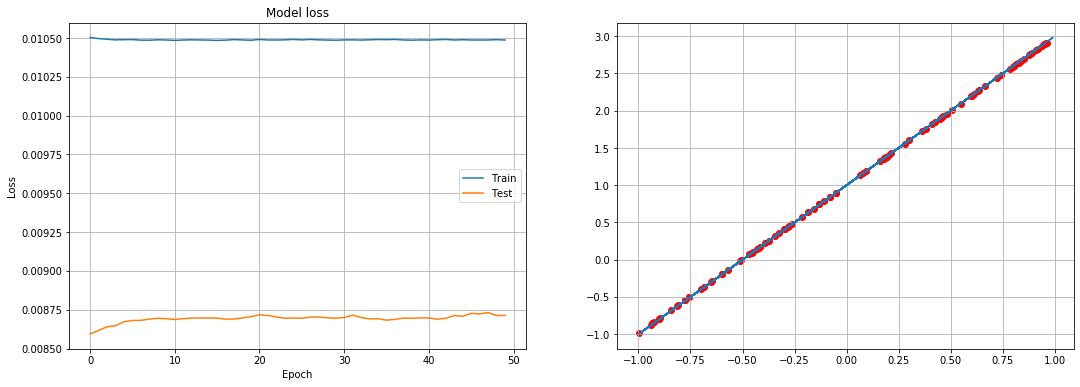

In [26]:
y_train = np.random.normal(y_train_mean, best_sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(y_valid_mean, best_sigma)

history = model.fit(x=x_train[:best_N_train], y=y_train[:best_N_train], batch_size=32, epochs=best_N_epochs ,shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

plt.figure(figsize = (18, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot(1, 2, 2)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_valid_mean)
plt.grid(True)

Not surprisingly best results are obtained with low values of noise $\sigma$ and with bigger training set.
The training performed with the intermediate value of $N_{epochs}$ shows best result than the one performed with the higher value, symptom that probably our simple NN tends to suffer of overfitting.

### Exercise 2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [28]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 200)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()

y_target = 4. - 3.*x_valid - 2.*x_valid**2 + 3.*x_valid**3

sigma=0.2
y_train = np.random.normal(4. - 3.*x_train - 2.*x_train**2 + 3.*x_train**3, sigma)
y_valid = np.random.normal(4. - 3.*x_valid - 2.*x_valid**2 + 3.*x_valid**3, sigma)

In [29]:
def get_model(N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn):
    
    model = keras.models.Sequential()
    
    #input layer
    model.add(keras.layers.Dense(N_neurons_per_layer, activation=activ_fn, input_shape=(1,)))
    
    #deep layers
    for i in range(1, N_layers-1):
        model.add(keras.layers.Dense(N_neurons_per_layer, activation=activ_fn))
        
    #output layer
    model.add(keras.layers.Dense(1, activation=activ_fn))
    
    model.compile(loss=loss_fn, optimizer=optim, metrics=['mse'])

    return model

Results for N_layers = 3 , N_neurons_per_layer = 10 : loss =  0.1287666541337967


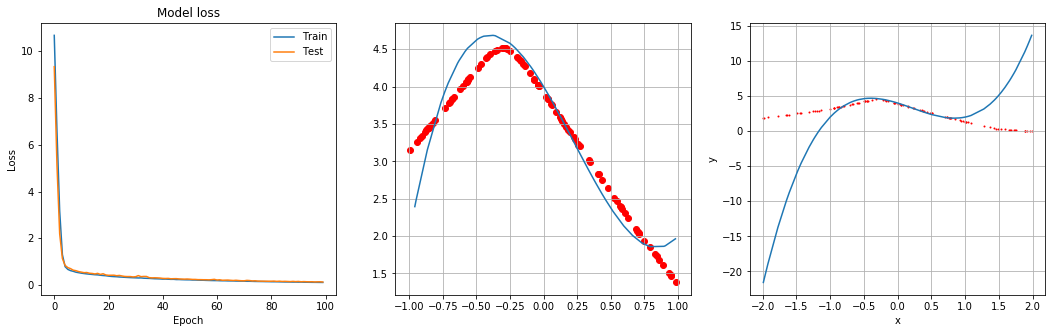

Results for N_layers = 3 , N_neurons_per_layer = 20 : loss =  0.10656988248229027


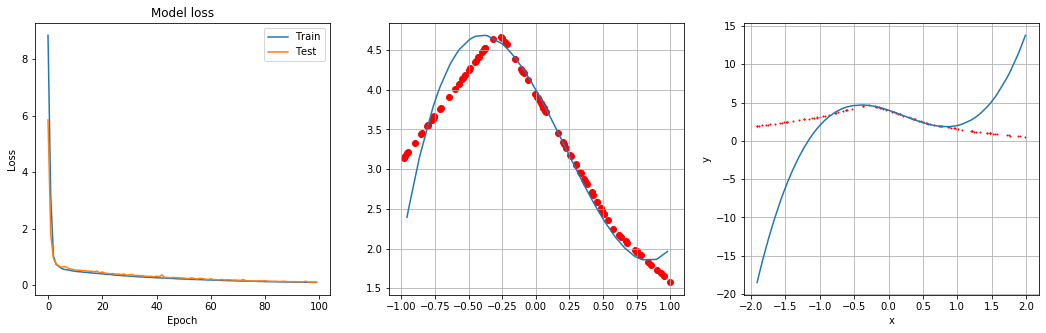

Results for N_layers = 3 , N_neurons_per_layer = 30 : loss =  0.11075404182076454


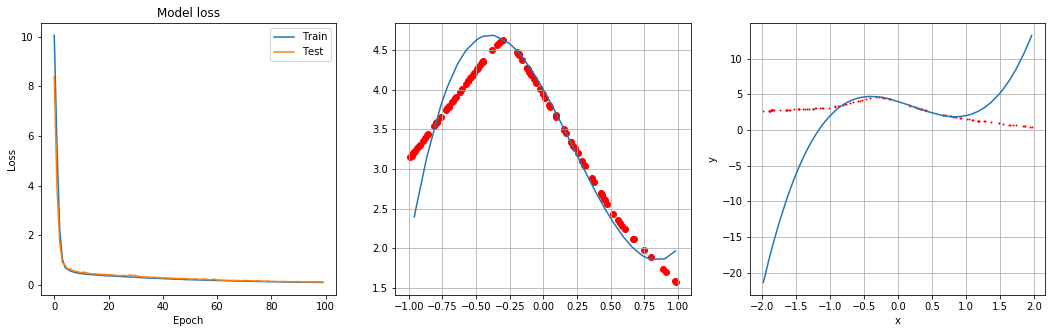

Results for N_layers = 5 , N_neurons_per_layer = 10 : loss =  0.06059212163090706


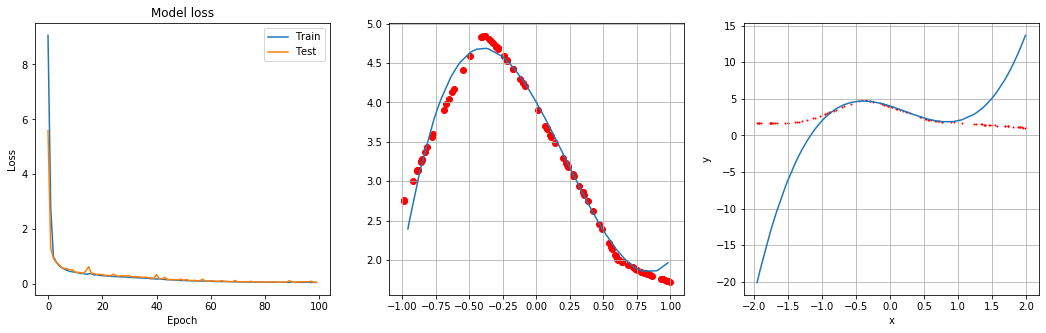

Results for N_layers = 5 , N_neurons_per_layer = 20 : loss =  0.095616994202137


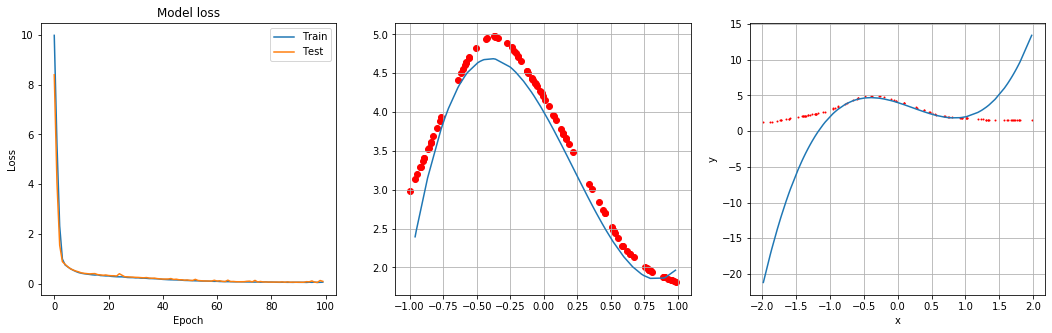

Results for N_layers = 5 , N_neurons_per_layer = 30 : loss =  0.06483107060194016


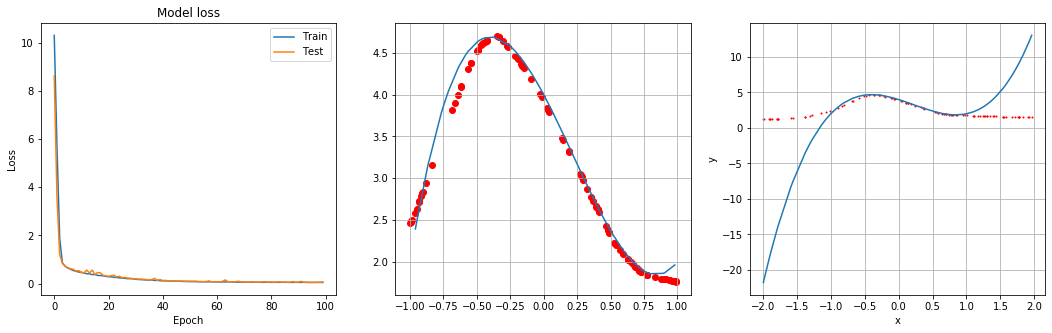

Results for N_layers = 10 , N_neurons_per_layer = 10 : loss =  13.474969902038573


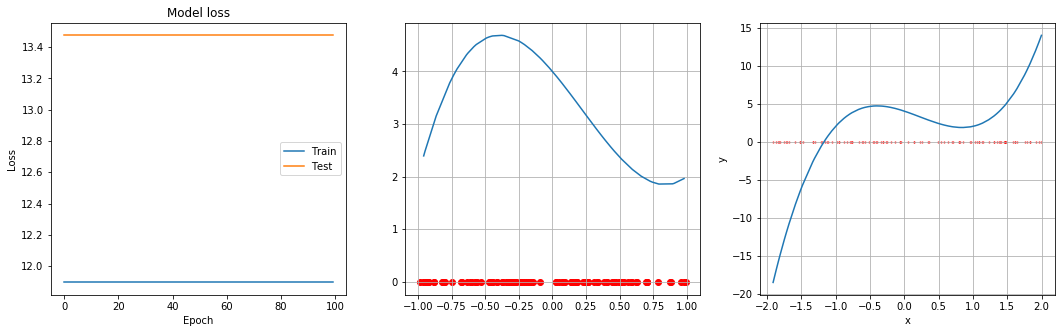

Results for N_layers = 10 , N_neurons_per_layer = 20 : loss =  0.08348405718803406


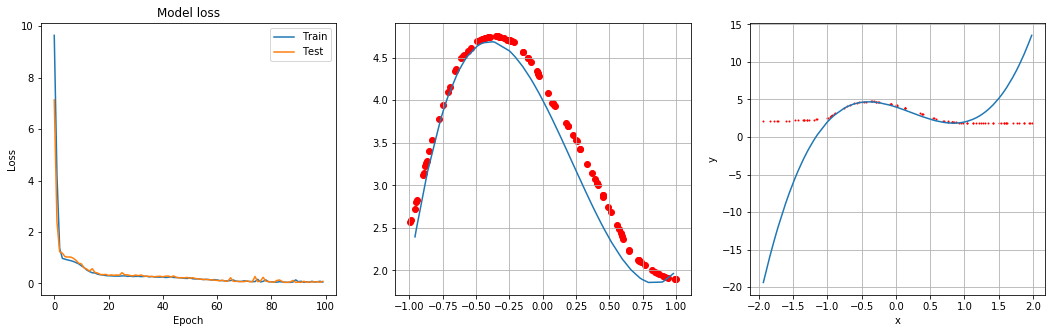

Results for N_layers = 10 , N_neurons_per_layer = 30 : loss =  0.04474016010761261


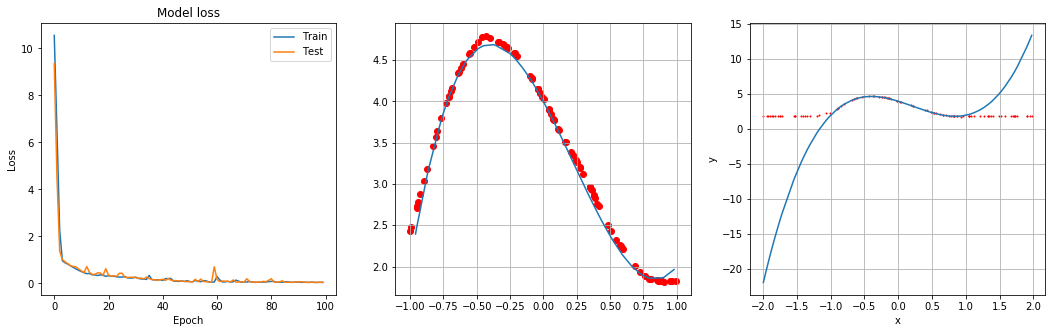

In [47]:
Ns_layers=[3,5,10]
Ns_neurons_per_layer=[10,20,30]
activ_fn='relu'
optim='sgd'
loss_fn='mse'

#reproducibility
np.random.seed(1997)

index = 1

for N_layers in Ns_layers:
    for N_neurons_per_layer in Ns_neurons_per_layer:
        
        plt.figure(index, figsize = (18, 4))
        
        model = get_model(N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn)

        history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100 ,shuffle=True, validation_data=(x_valid, y_valid), verbose=0)
        
        # look into training history
        # Plot training & validation loss values
        plt.subplot(1, 3, 1)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='best')

        plt.subplot(1, 3, 2)
        x_predicted = np.random.uniform(-1, 1, 100)
        y_predicted = model.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted,color='r')
        plt.plot(x_valid, y_target)
        plt.grid(True)
        
        plt.subplot(1, 3, 3)
        x_test = np.random.uniform(-2, 2, 100)
        y_test = np.random.normal(4. - 3.*x_test - 2.*x_test**2 + 3.*x_test**3, sigma)
        x_test.sort()
        y_test_target = 4. - 3.*x_test - 2.*x_test**2 + 3.*x_test**3

        score = model.evaluate(x_test, y_test, verbose=0)
        y_predicted = model.predict(x_test)

        plt.scatter(x_test, y_predicted,color='r', marker='o', s=1)
        plt.plot(x_test, y_test_target)
        plt.ylabel('y')
        plt.xlabel('x')
        plt.grid(True)

        index=index+1
       
        print("Results for N_layers =", N_layers,", N_neurons_per_layer =",N_neurons_per_layer, ": loss = ", history.history['val_loss'][-1])
        plt.show()

Results for optim = sgd , activ_fn = relu , loss_fn = mean_squared_error : loss =  13.474969902038573


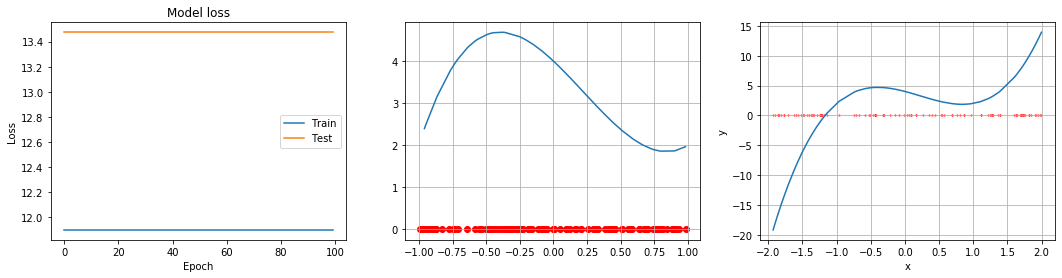

Results for optim = sgd , activ_fn = relu , loss_fn = mean_absolute_error : loss =  3.521148347854614


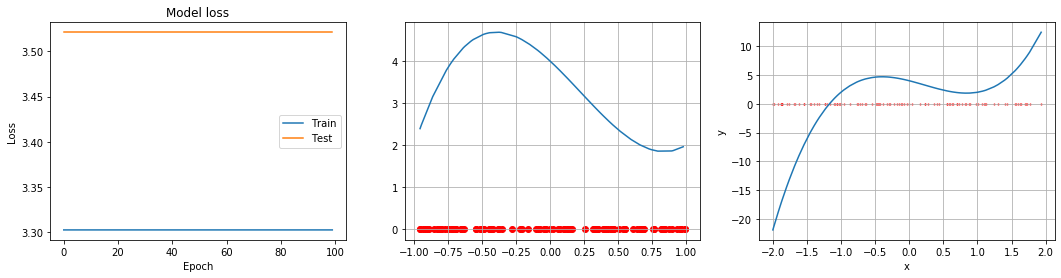

Results for optim = adam , activ_fn = relu , loss_fn = mean_squared_error : loss =  13.474969902038573


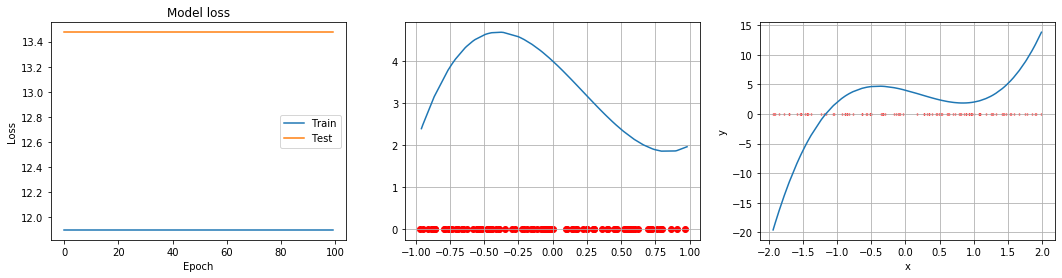

Results for optim = adam , activ_fn = relu , loss_fn = mean_absolute_error : loss =  0.15326863944530486


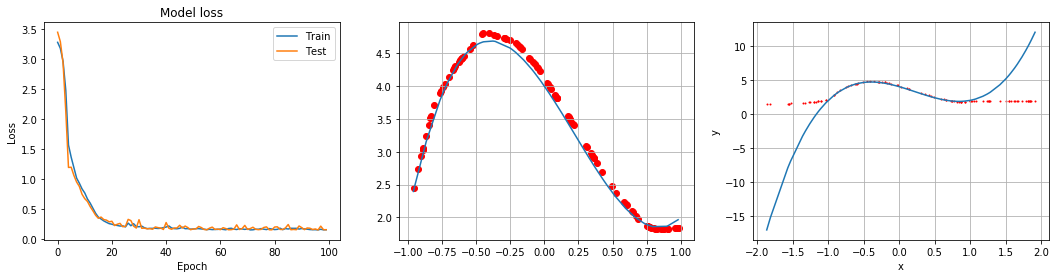

Results for optim = sgd , activ_fn = sigmoid , loss_fn = mean_squared_error : loss =  7.447533035278321


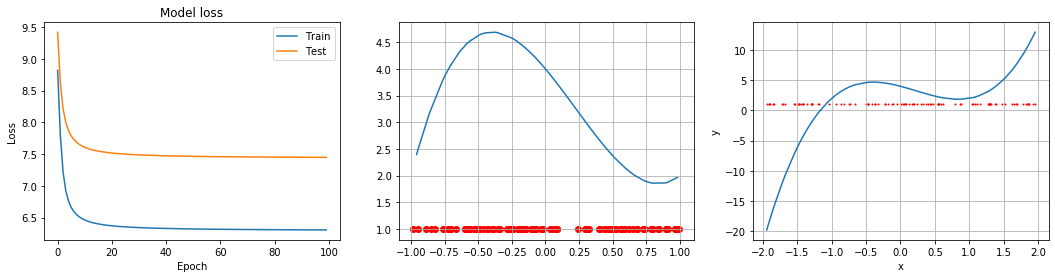

Results for optim = sgd , activ_fn = sigmoid , loss_fn = mean_absolute_error : loss =  2.537073950767517


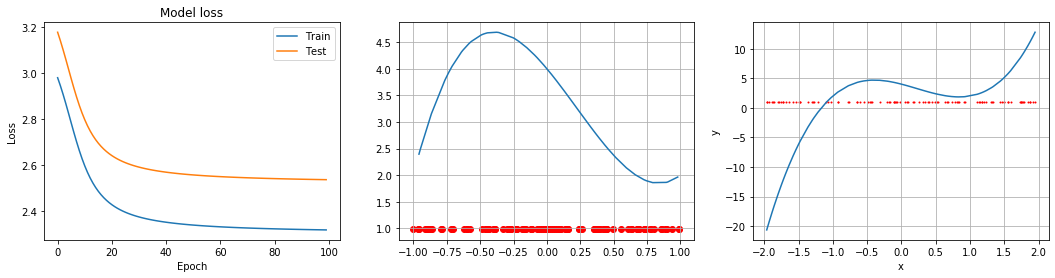

Results for optim = adam , activ_fn = sigmoid , loss_fn = mean_squared_error : loss =  7.441802921295166


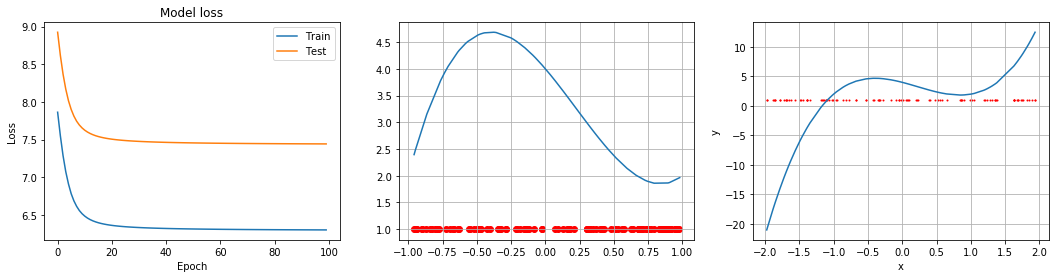

Results for optim = adam , activ_fn = sigmoid , loss_fn = mean_absolute_error : loss =  2.5233019828796386


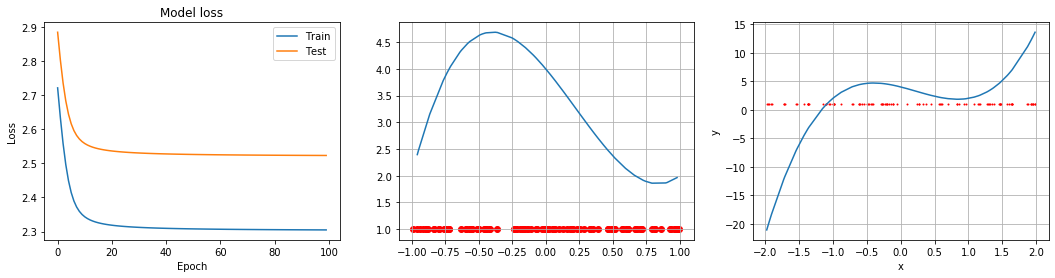

In [51]:
Ns_layers=10
Ns_neurons_per_layer=30
activ_fns=['relu', 'sigmoid']
optims=['sgd', 'adam']
loss_fns=['mean_squared_error', 'mean_absolute_error']

index = 1

for activ_fn in activ_fns:
    for optim in optims:
        for loss_fn in loss_fns:
            
            plt.figure(index, figsize = (18, 4))

            model = get_model(N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn)

            history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100 ,shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

            # look into training history
            # Plot training & validation loss values
            plt.subplot(1, 3, 1)
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Test'], loc='best')

            plt.subplot(1, 3, 2)
            x_predicted = np.random.uniform(-1, 1, 100)
            y_predicted = model.predict(x_predicted)
            plt.scatter(x_predicted, y_predicted,color='r')
            plt.plot(x_valid, y_target)
            plt.grid(True)

            plt.subplot(1, 3, 3)
            x_test = np.random.uniform(-2, 2, 100)
            y_test = np.random.normal(4. - 3.*x_test - 2.*x_test**2 + 3.*x_test**3, sigma)
            x_test.sort()
            y_test_target = 4. - 3.*x_test - 2.*x_test**2 + 3.*x_test**3

            score = model.evaluate(x_test, y_test, verbose=0)
            y_predicted = model.predict(x_test)

            plt.scatter(x_test, y_predicted,color='r', marker='o', s=1)
            plt.plot(x_test, y_test_target)
            plt.ylabel('y')
            plt.xlabel('x')
            plt.grid(True)

            index=index+1

            print("Results for optim =", optim,", activ_fn =",activ_fn, ", loss_fn =",loss_fn  ,": loss = ", history.history['val_loss'][-1])
            plt.show()

### Exercise 3

Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [61]:
# generate training inputs
np.random.seed(0)

x_train = np.random.uniform(-1.5, 1.5, 1000)
y_train =np.random.uniform(-1.5, 1.5, 1000)
x_valid = np.random.uniform(-1.5, 1.5, 500)
y_valid = np.random.uniform(-1.5, 1.5, 500)
#x_valid.sort()

z_target = np.sin(x_valid**2+y_valid**2)

sigma=0.2
z_train = np.random.normal(np.sin(x_train**2+y_train**2), sigma)
z_valid = np.random.normal(np.sin(x_valid**2+y_valid**2), sigma)

data_train=np.array([x_train, y_train]).T
data_valid=np.array([x_valid, y_valid]).T

In [62]:
def get_model(N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn):
    
    model = keras.models.Sequential()
    
    #input layer
    model.add(keras.layers.Dense(N_neurons_per_layer, activation=activ_fn, input_shape=(2,)))
    
    #deep layers
    for i in range(1, N_layers-1):
        model.add(keras.layers.Dense(N_neurons_per_layer, activation=activ_fn))
        
    #output layer
    model.add(keras.layers.Dense(1, activation=activ_fn))
    
    model.compile(loss=loss_fn, optimizer=optim, metrics=['mse'])

    return model

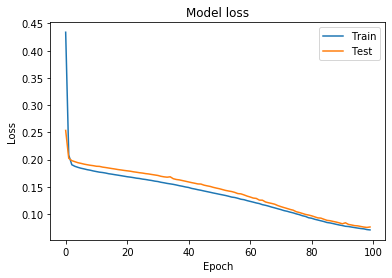

In [63]:
N_layers=5
N_neurons_per_layer=30
activ_fn='relu'
optim='sgd'
loss_fn='mse'

#reproducibility
np.random.seed(1997)

model = get_model(N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn)

history = model.fit(x=data_train, y=z_train, batch_size=32, epochs=100 ,shuffle=True, validation_data=(data_valid, z_valid), verbose=0)
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

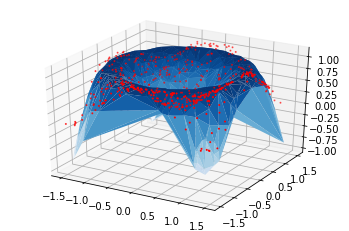

In [64]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x_valid, y_valid, z_target, linewidth=0.2, antialiased=True, cmap=cm.Blues)
x_predicted = np.random.uniform(-1.5, 1.5, 500)
y_predicted = np.random.uniform(-1.5, 1.5, 500)
data_predicted = np.array([x_predicted, y_predicted]).T
z_predicted = model.predict(data_predicted)
ax.scatter(x_predicted, y_predicted, z_predicted, color='r', marker='o', s=1)

plt.show()